Example 1: sin(x)


<ipython-input-1-36c9adf8336f>:40: RuntimeWarning: divide by zero encountered in scalar divide
  m = a[i] / b[i - 1]
<ipython-input-1-36c9adf8336f>:41: RuntimeWarning: invalid value encountered in scalar multiply
  b[i] = b[i] - m * c[i - 1]
<ipython-input-1-36c9adf8336f>:42: RuntimeWarning: invalid value encountered in scalar multiply
  d[i] = d[i] - m * d[i - 1]


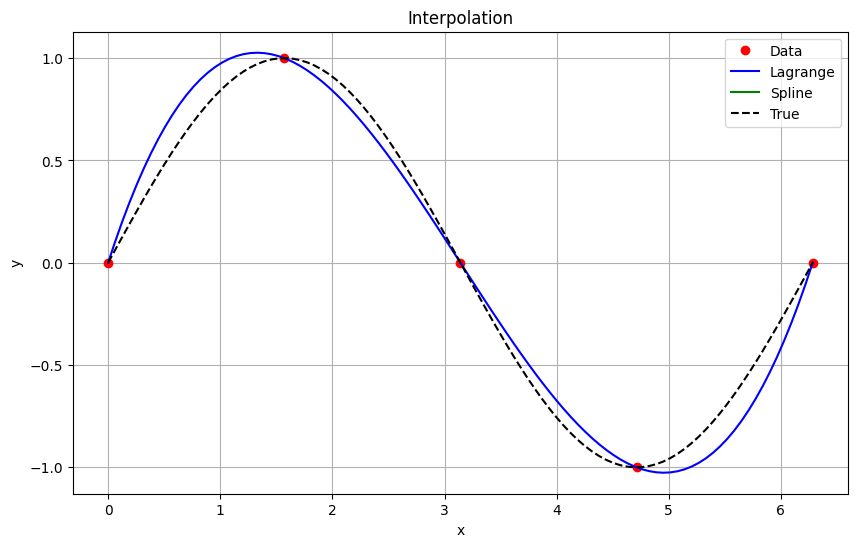


Example 2: Data points


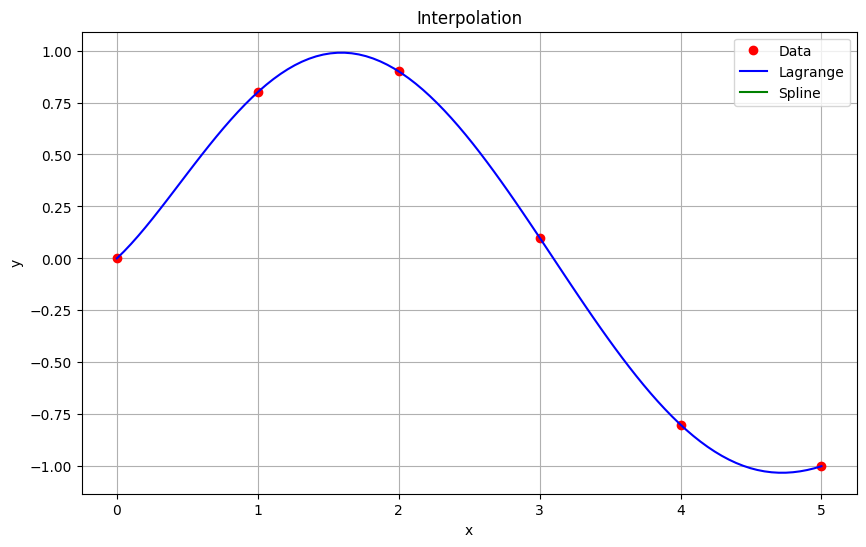


Example 3: Runge's Phenomenon


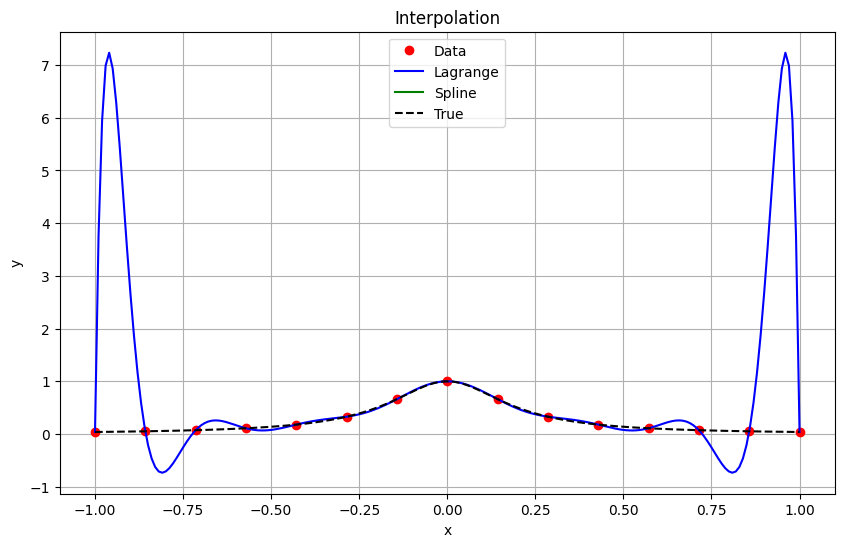


Example 4: Chebyshev Nodes


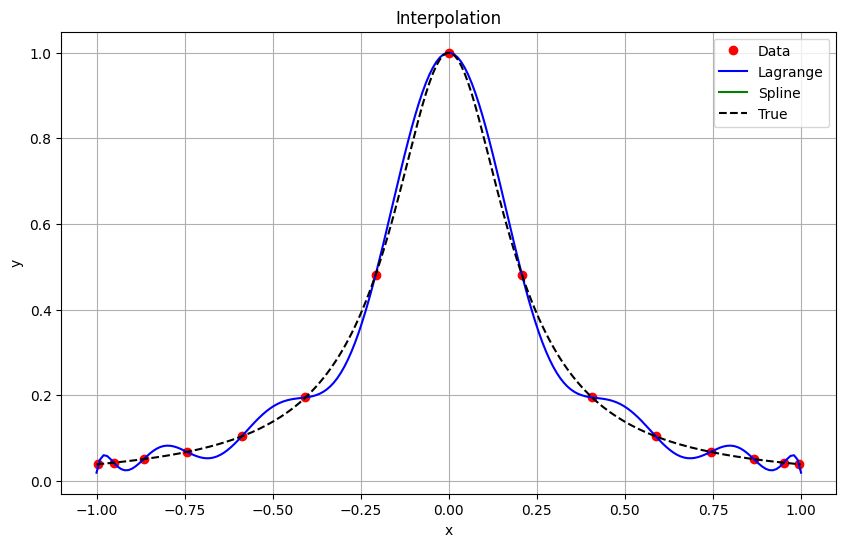

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return np.sin(x)

def lagrange_interp(x_nodes, y_nodes, x_eval):
    y_interp = np.zeros_like(x_eval, dtype=float)
    for i in range(len(x_eval)):
        term = 0
        for j in range(len(x_nodes)):
            product = y_nodes[j]
            for k in range(len(x_nodes)):
                if k != j:
                    product *= (x_eval[i] - x_nodes[k]) / (x_nodes[j] - x_nodes[k])
            term += product
        y_interp[i] = term
    return y_interp

def cubic_spline_interp(x_nodes, y_nodes, x_eval):
    n = len(x_nodes)
    h = np.diff(x_nodes)
    if np.any(h <= 0):
        raise ValueError("x_nodes must be strictly increasing")

    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)
    u = np.zeros(n)
    v = np.zeros(n)
    z = np.zeros(n)

    a[1:-1] = h[:-1]
    b[1:-1] = 2 * (h[:-1] + h[1:])
    c[1:-1] = h[1:]
    d[1:-1] = 6 * ((y_nodes[2:] - y_nodes[1:-1]) / h[1:] - (y_nodes[1:-1] - y_nodes[:-2]) / h[:-1])

    for i in range(1, n - 1):
        m = a[i] / b[i - 1]
        b[i] = b[i] - m * c[i - 1]
        d[i] = d[i] - m * d[i - 1]
    z[n - 2] = d[n - 2] / b[n - 2]
    for i in range(n - 3, 0, -1):
        z[i] = (d[i] - c[i] * z[i + 1]) / b[i]

    y_interp = np.zeros_like(x_eval, dtype=float)
    for i, x in enumerate(x_eval):
        j = np.searchsorted(x_nodes, x) - 1
        if j < 0:
           j = 0
        elif j >= n-1:
           j = n-2

        dx = x - x_nodes[j]
        dy = x_nodes[j+1] - x_nodes[j]

        if dy == 0:
            y_interp[i] = y_nodes[j]
        else:
            y_interp[i] = (z[j] * (x_nodes[j+1] - x)**3 + z[j+1] * (x - x_nodes[j])**3) / (6 * dy) + \
                      ((y_nodes[j] / dy - z[j] * dy / 6) * (x_nodes[j+1] - x) + \
                       (y_nodes[j+1] / dy - z[j+1] * dy / 6) * (x - x_nodes[j]))

    return y_interp

def chebyshev_nodes(n, a=-1, b=1):
    k = np.arange(1, n + 1)
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k - 1) * np.pi / (2 * n))

def plot_it(x_nodes, y_nodes, x_eval, y_lagrange, y_spline, true_func=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x_nodes, y_nodes, 'ro', label='Data')
    plt.plot(x_eval, y_lagrange, 'b-', label='Lagrange')
    plt.plot(x_eval, y_spline, 'g-', label='Spline')

    if true_func:
        y_true = true_func(x_eval)
        plt.plot(x_eval, y_true, 'k--', label='True')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolation')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    print("Example 1: sin(x)")
    x_n = np.linspace(0, 2 * np.pi, 5)
    y_n = f1(x_n)
    x_e = np.linspace(0, 2 * np.pi, 100)

    y_lag = lagrange_interp(x_n, y_n, x_e)
    y_spl = cubic_spline_interp(x_n, y_n, x_e)
    plot_it(x_n, y_n, x_e, y_lag, y_spl, true_func=f1)

    print("\nExample 2: Data points")
    x_data = np.array([0, 1, 2, 3, 4, 5])
    y_data = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])
    x_eval2 = np.linspace(0, 5, 100)

    y_lagrange2 = lagrange_interp(x_data, y_data, x_eval2)
    y_spline2 = cubic_spline_interp(x_data, y_data, x_eval2)
    plot_it(x_data, y_data, x_eval2, y_lagrange2, y_spline2)

    print("\nExample 3: Runge's Phenomenon")
    def runge(x):
        return 1 / (1 + 25 * x**2)

    n_nodes = 15
    x_nodes_runge = np.linspace(-1, 1, n_nodes)
    y_runge = runge(x_nodes_runge)
    x_eval_runge = np.linspace(-1, 1, 200)

    y_lr = lagrange_interp(x_nodes_runge, y_runge, x_eval_runge)
    y_sr = cubic_spline_interp(x_nodes_runge, y_runge, x_eval_runge)
    plot_it(x_nodes_runge, y_runge, x_eval_runge, y_lr, y_sr, true_func=runge)

    print("\nExample 4: Chebyshev Nodes")
    n_cheb = 15
    x_cheb = np.sort(chebyshev_nodes(n_cheb))
    y_cheb = runge(x_cheb)
    xe_cheb = np.linspace(-1, 1, 200)

    y_lag_cheb = lagrange_interp(x_cheb, y_cheb, xe_cheb)
    y_spl_cheb = cubic_spline_interp(x_cheb, y_cheb, xe_cheb)
    plot_it(x_cheb, y_cheb, xe_cheb, y_lag_cheb, y_spl_cheb, true_func=runge)

if __name__ == "__main__":
    main()